In [188]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import seaborn as sb

%matplotlib inline

In [189]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# ESG 10 Year Monte Carlo

In [190]:
tickers1 = ['GCCHX', 'SPYX', 'ESGD']
tickers2 = ['CTEC', 'CRBN', 'EFAX']
tickers3 = ['ETHO', 'FAN']

# These are the tickers we discussed that have data that can be pulled from Alapaca. I havent tried other API's yet. 
tickersfin = ['SPYX', 'ESGD', 'CRBN', 'EFAX', 'ETHO', 'FAN']

timeframe = "1D"

# Pulling just a year for now to ensure they have usable data: 
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Ignore 
esg_data1 = api.get_barset(
    tickers1,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data2 = api.get_barset(
    tickers2,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data3 = api.get_barset(
    tickers3,
    timeframe,
    start=start_date,
    end=end_date
).df

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df



# esg_data1.tail(10)
esg_datafin.tail(10)


CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2020-12-31 00:00:00-05:00  148.79  149.1200  148.4344  148.8900  11051.0   
2021-01-04 00:00:00-05:00  150.57  150.5700  147.3300  148.2600  22735.0   
2021-01-05 00:00:00-05:00  148.31  149.9300  148.3100  149.7400  18455.0   
2021-01-06 00:00:00-05:00  149.04  151.6100  148.9950  150.3299   8590.0   
2021-01-07 00:00:00-05:00  151.03  152.2400  151.0300  152.2400  10608.0   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                     ...  \
                             open    high      low    close   volume  ...   
time                                                                  ...   
2020-12-31 00:00:00-05:00  78.250  78.250  77.8541  77.9700   2813.0  ...   
2021-01-04 00:00:00-05:00  79.320  79.320  77.9600  78.3900  14051.0  ...   
2021-01-05 00:00:00-05:00  78.660  79.108  78.4300  79.0800  10190.0  ...   
2021-01-06 00:00:00-05:00  79.320  79.790  79.3200  79.7000   6864.0  ...   
2021-01-07 00:00:00-05:00  79.230  79.780  79.2300  79.7800   5894.0  ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.8800  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.9000  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.0300  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.3000  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.5400  80.2680  11677.0  ...   

                             FAN                                       SPYX  \
                            open     high      low   close    volume   open   
time                                                                          
2020-12-31 00:00:00-05:00  23.38  23.3900  23.2200  23.300  133095.0  92.44   
2021-01-04 00:00:00-05:00  24.10  24.1700  23.8104  23.920  640086.0  93.28   
2021-01-05 00:00:00-05:00  24.01  24.1900  23.9501  24.165  443523.0  91.36   
2021-01-06 00:00:00-05:00  24.83  25.3700  24.6500  25.080  716286.0  91.36   
2021-01-07 00:00:00-05:00  25.80  26.0350  25.6845  26.015  676909.0  93.49   
2021-01-08 00:00:00-05:00  26.00  26.1400  25.7300  25.970  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.1500  25.470  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.9100  25.030  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.1000  25.100  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.8000  24.850  585176.0  94.17   

                                                           
                            high      low  close   volume  
time                                                       
2020-12-31 00:00:00-05:00  93.03  92.2200  93.02  14577.0  
2021-01-04 00:00:00-05:00  93.28  90.6400  91.51  40657.0  
2021-01-05 00:00:00-05:00  92.21  91.3600  92.05  21952.0  
2021-01-06 00:00:00-05:00  93.29  91.3600  92.52  32379.0  
2021-01-07 00:00:00-05:00  93.99  93.2500  93.84  37666.0  
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680.0  

[10 rows x 30 columns]

In [191]:
# Basic data 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  929.000000  929.000000  929.000000  929.000000  9.290000e+02   
mean   119.050935  119.791873  118.294410  119.263777  1.436545e+04   
std     10.665972    9.801833   12.066609    9.900015  5.955026e+04   
min      0.000000   91.000000    0.000000   89.440000  1.320000e+02   
25%    112.660000  113.700000  111.990000  113.070000  5.014000e+03   
50%    117.820000  118.369000  117.390000  117.950000  7.231000e+03   
75%    123.070000  123.420000  122.570000  123.210000  1.279700e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             EFAX                                                     ...  \
             open        high         low       close         volume  ...   
count  880.000000  880.000000  880.000000  880.000000     880.000000  ...   
mean    68.649934   69.000934   68.410840   68.839216    4262.684091  ...   
std      5.686690    4.613316    6.140629    4.646381   11629.244065  ...   
min      0.000000   49.970000    0.000000   49.250000       1.000000  ...   
25%     66.352500   66.462775   66.240000   66.351000     620.000000  ...   
50%     69.400000   69.575000   69.240000   69.397500    1375.500000  ...   
75%     71.773500   72.012500   71.649675   71.908175    3442.500000  ...   
max     80.225000   80.380000   79.880000   80.300000  180001.000000  ...   

              FAN                                                    \
             open        high         low       close        volume   
count  931.000000  931.000000  931.000000  931.000000  9.310000e+02   
mean    13.970481   14.029242   13.889013   13.968169  6.826176e+04   
std      2.369840    2.382922    2.398088    2.372064  1.291487e+05   
min     10.580000   10.590000    0.000000   10.230000  1.310000e+02   
25%     12.820000   12.880000   12.775200   12.830000  1.524500e+04   
50%     13.244000   13.289900   13.200000   13.240000  2.745700e+04   
75%     13.985000   14.030000   13.915000   13.980000  6.137650e+04   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                     
             open        high         low       close         volume  
count  930.000000  930.000000  930.000000  930.000000     930.000000  
mean    70.507701   70.962778   69.982988   70.553122   23017.260215  
std      9.098296    8.532972    9.330577    8.470685   35091.283656  
min      0.000000   57.130000    0.000000   55.585000     165.000000  
25%     64.731050   65.000000   64.176250   64.670050    5925.750000  
50%     69.115000   69.310000   68.537200   68.895000   11517.500000  
75%     75.307500   75.862600   74.865000   75.235000   25362.250000  
max     94.250000   94.250000   93.410000   94.200000  449801.000000  

[8 rows x 30 columns]

In [192]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast ten years daily returns
MC_Sim_10 = MCSimulation(
    portfolio_data = esg_datafin,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [193]:
MC_Sim_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996857,1.007197,0.998825,1.001699,1.003613,1.004861,0.997192,0.995461,1.005419,1.004112,...,0.999791,1.008987,1.002956,1.007254,1.007096,1.004839,0.995340,1.010993,1.012246,1.001473
2,1.000938,1.007934,0.999016,0.997609,1.010843,1.009914,0.999619,0.990618,1.002575,0.999685,...,1.002700,1.012750,0.996340,1.014553,1.002597,1.000434,0.994190,1.015560,1.018194,1.007254
3,0.996822,1.017337,1.009977,1.004739,1.003226,1.020797,0.995822,0.985882,1.010694,1.000521,...,1.008489,1.018004,1.002405,1.017769,1.006228,1.007426,0.996056,1.008316,1.016692,1.017382
4,1.003518,1.020318,1.014378,0.999264,1.007724,1.029733,0.997579,0.979929,1.008904,0.993362,...,1.013543,1.019042,1.007665,1.012314,1.004860,1.002780,0.997522,1.007266,1.018276,1.015823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.643173,2.801672,3.640611,4.738293,4.582317,3.961127,1.892462,4.463834,2.937957,3.442044,...,4.246621,6.443087,3.385495,3.634890,3.155000,4.918059,3.967470,3.650574,3.256725,3.008467
2517,4.659199,2.794519,3.634749,4.726439,4.581848,3.988699,1.905492,4.492980,2.931222,3.431791,...,4.219520,6.410492,3.385522,3.606211,3.143971,4.897754,3.938479,3.639684,3.221962,3.033595
2518,4.684407,2.795463,3.603679,4.730672,4.605690,4.011207,1.897355,4.480234,2.937808,3.408478,...,4.277404,6.465043,3.368683,3.587330,3.176202,4.864875,3.921030,3.633724,3.240929,3.054849
2519,4.686366,2.810934,3.624044,4.713613,4.604722,4.030644,1.927044,4.516560,2.920071,3.416515,...,4.292802,6.456317,3.389344,3.556144,3.181141,4.842647,3.975265,3.629149,3.217803,3.063991


In [194]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_Sim_10.simulated_return.mean(axis=1)),
    "median": list(MC_Sim_10.simulated_return.median(axis=1)),
    "min": list(MC_Sim_10.simulated_return.min(axis=1)),
    "max": list(MC_Sim_10.simulated_return.max(axis=1)),
    "std": list(MC_Sim_10.simulated_return.std(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_10 = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns_10.head()

,mean,median,min,max,std
0,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.000634,1.000552,0.985309,1.017275,0.005428
2,1.001232,1.001302,0.979209,1.020406,0.007527
3,1.001247,1.001240,0.972833,1.027319,0.009237
4,1.001923,1.002295,0.969060,1.032343,0.010127


<AxesSubplot:title={'center':'Simulated Daily Returns of Portfolio Over 10 Years'}>

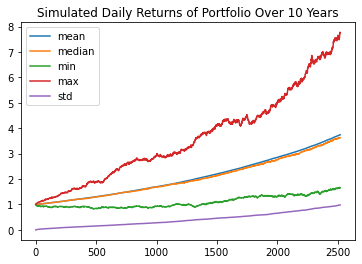

In [195]:
#Plot daily returns over 10 year period

df_simulated_returns_10.plot(title="Simulated Daily Returns of Portfolio Over 10 Years")



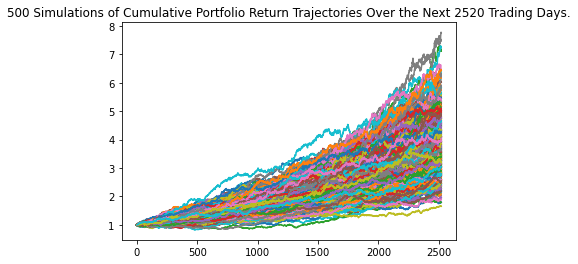

In [196]:
 # Plot simulation outcomes
line_plot = MC_Sim_10.plot_simulation()

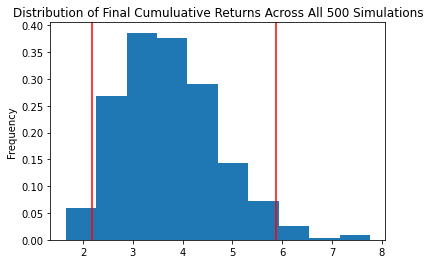

In [197]:
#Plot distriubtion of cum returns
dist_plot = MC_Sim_10.plot_distribution()

In [198]:
sim_10_table = MC_Sim_10.summarize_cumulative_return()

print(sim_10_table)

count           500.000000
mean              3.743383
std               0.981621
min               1.652030
25%               3.039389
50%               3.623782
75%               4.330902
max               7.760459
95% CI Lower      2.185154
95% CI Upper      5.867083
Name: 2520, dtype: float64


In [199]:
Sim_10_lower = round(sim_10_table[8]*10000,2)
Sim_10_upper = round(sim_10_table[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${Sim_10_lower} and ${Sim_10_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $21851.54 and $58670.83.


# ESG 10 Year Portfolio Returns, Risk

In [200]:
#Organize data and clean
esg_datafin.tail()

CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                   ...  \
                             open    high    low    close   volume  ...   
time                                                                ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.88  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.90  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.03  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.30  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.54  80.2680  11677.0  ...   

                             FAN                                    SPYX  \
                            open     high    low  close    volume   open   
time                                                                       
2021-01-08 00:00:00-05:00  26.00  26.1400  25.73  25.97  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.15  25.47  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.91  25.03  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.10  25.10  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.80  24.85  585176.0  94.17   

                                                           
                            high      low  close   volume  
time                                                       
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680.0  

[5 rows x 30 columns]

In [201]:
#Organize data for closing prices only
esg_closing_prices = pd.DataFrame()

esg_closing_prices["SPYX"] = esg_datafin["SPYX"]["close"]
esg_closing_prices["ESGD"] = esg_datafin["ESGD"]["close"]
esg_closing_prices["CRBN"] = esg_datafin["CRBN"]["close"]
esg_closing_prices["EFAX"] = esg_datafin["EFAX"]["close"]
esg_closing_prices["ETHO"] = esg_datafin["ETHO"]["close"]
esg_closing_prices["FAN"] = esg_datafin["FAN"]["close"]

esg_closing_prices.index = esg_closing_prices.index.date

esg_closing_prices.tail(10)



,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
2020-12-31,93.02,73.04,148.8900,77.9700,53.0600,23.300
2021-01-04,91.51,73.48,148.2600,78.3900,52.5500,23.920
2021-01-05,92.05,74.16,149.7400,79.0800,52.9100,24.165
2021-01-06,92.52,75.04,150.3299,79.7000,54.0413,25.080
2021-01-07,93.84,75.14,152.2400,79.7800,55.2321,26.015
2021-01-08,94.20,75.77,153.3400,80.3000,55.3800,25.970
2021-01-11,93.73,74.82,152.2499,79.4169,55.2001,25.470
2021-01-12,93.65,75.15,152.4160,79.5400,55.4300,25.030
2021-01-13,93.83,75.06,152.6800,79.4841,55.7180,25.100
2021-01-14,93.44,75.60,152.5200,80.2680,55.7100,24.850


In [202]:
esg_closing_prices.describe()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
count,930.000000,932.000000,929.000000,880.000000,928.000000,931.000000
mean,70.553122,64.497059,119.263777,68.839216,37.703861,13.968169
std,8.470685,4.181011,9.900015,4.646381,5.289277,2.372064
min,55.585000,46.330000,89.440000,49.250000,28.604400,10.230000
25%,64.670050,62.620000,113.070000,66.351000,34.012250,12.830000
50%,68.895000,64.550000,117.950000,69.397500,36.806200,13.240000
75%,75.235000,67.295000,123.210000,71.908175,40.602625,13.980000
max,94.200000,75.770000,153.340000,80.300000,55.718000,26.015000


<AxesSubplot:>

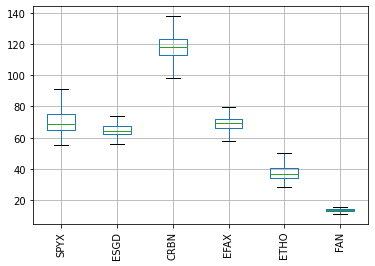

In [203]:
esg_closing_prices.boxplot(showfliers=False, rot=90)

In [204]:
esg_std = esg_closing_prices.std()
esg_std

SPYX    8.470685
ESGD    4.181011
CRBN    9.900015
EFAX    4.646381
ETHO    5.289277
FAN     2.372064
dtype: float64

<AxesSubplot:>

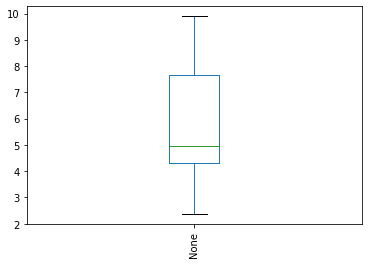

In [205]:
#Plot standard deviation of ESG closing prices ????
esg_std.plot(kind='box', showfliers=False, rot=90)

In [206]:
esg_correlation = esg_closing_prices.corr()
esg_correlation

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
SPYX,1.000000,0.341758,0.927630,0.288417,0.990488,0.824315
ESGD,0.341758,1.000000,0.660049,0.986701,0.376645,0.499415
CRBN,0.927630,0.660049,1.000000,0.616706,0.934508,0.877405
EFAX,0.288417,0.986701,0.616706,1.000000,0.317022,0.498022
ETHO,0.990488,0.376645,0.934508,0.317022,1.000000,0.835373
FAN,0.824315,0.499415,0.877405,0.498022,0.835373,1.000000


<AxesSubplot:>

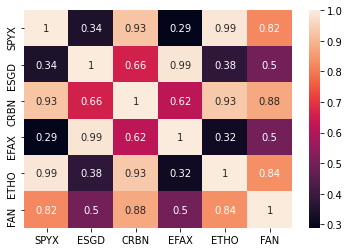

In [207]:
sb.heatmap(esg_correlation, annot=True)

In [208]:

#Annualized Standard Deviation
esg_closing_prices.std()/np.sqrt(252)

SPYX    0.533603
ESGD    0.263379
CRBN    0.623642
EFAX    0.292694
ETHO    0.333193
FAN     0.149426
dtype: float64

In [209]:
#Sharpe Ratio
esg_sharpe = (esg_daily_returns.mean() * 252) / (esg_daily_returns.std() * np.sqrt(252))
esg_sharpe

SPYX    0.720271
ESGD    0.367508
CRBN    0.553450
EFAX    0.182056
ETHO    0.818591
FAN     0.888364
dtype: float64

In [210]:
# ESG FUNDS Daily Returns
esg_daily_returns = (esg_closing_prices/esg_closing_prices.shift(1)) -1
esg_daily_returns

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,0.000969,0.010275,0.006383,NaN,-0.004685,0.012066
2017-05-08,0.000055,-0.006689,0.001213,NaN,-0.004707,-0.010432
2017-05-09,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506
2017-05-10,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508
...,...,...,...,...,...,...
2021-01-08,0.003836,0.008384,0.007225,0.006518,0.002678,-0.001730
2021-01-11,-0.004989,-0.012538,-0.007109,-0.010998,-0.003248,-0.019253
2021-01-12,-0.000854,0.004411,0.001091,0.001550,0.004165,-0.017275
2021-01-13,0.001922,-0.001198,0.001732,-0.000703,0.005196,0.002797


<AxesSubplot:>

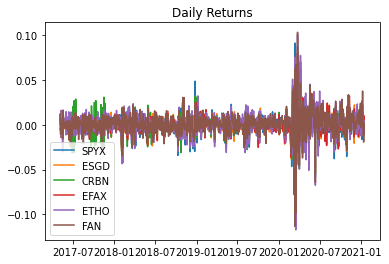

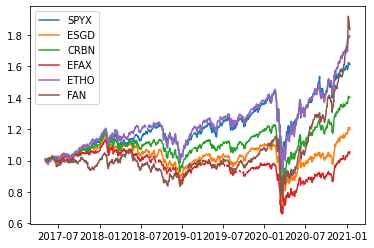

In [211]:
esg_daily_returns.plot(title='Daily Returns')

(esg_daily_returns+1).cumprod().plot()

<AxesSubplot:>

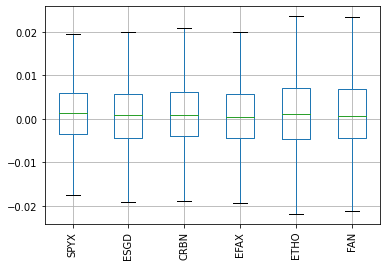

In [212]:
# Risk Analysis ESG Funds

esg_daily_returns.boxplot(showfliers=False, rot=90)


<AxesSubplot:>

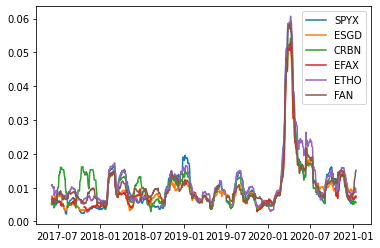

In [213]:
#Rolling Statistics
esg_daily_returns.rolling(window=21).std().plot()

# SP500 Returns and Monte Carlo

In [214]:
sp500 = ['SPY']

timeframeSPY = "1D"

start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

sp500_data = api.get_barset(
    sp500,
    timeframeSPY,
    start=start_date,
    end=end_date
).df

sp500_data.tail()

SPY                                    
                             open    high       low   close    volume
time                                                                 
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74  44814805
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81  45364896
2021-01-13 00:00:00-05:00  378.69  380.86  377.8500  379.76  38355050
2021-01-14 00:00:00-05:00  380.59  381.13  378.1000  378.45  41045335

In [215]:
#sp500_data.describe()

sp500_closing_prices = pd.DataFrame()

sp500_closing_prices["SPY"] = sp500_data["SPY"]["close"]

sp500_closing_prices.index = sp500_data.index.date

sp500_closing_prices.tail(10)

,SPY
2020-12-31,373.85
2021-01-04,368.85
2021-01-05,371.32
2021-01-06,373.53
2021-01-07,379.06
2021-01-08,381.24
2021-01-11,378.74
2021-01-12,378.81
2021-01-13,379.76
2021-01-14,378.45


In [216]:
sp500_closing_prices.describe()

,SPY
count,932.000000
mean,288.269501
std,32.543004
min,222.510000
25%,265.520000
50%,282.765000
75%,306.385000
max,381.240000


In [217]:
# Annualized STD
sp500_closing_prices.std()/np.sqrt(252)

SPY    2.050017
dtype: float64

In [218]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_sp500 = MCSimulation(
    portfolio_data = sp500_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [219]:
MC_sp500.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987112,1.006727,0.999054,1.011832,1.004973,1.011423,0.981672,0.999264,0.996046,0.992262,...,1.004895,1.018028,1.008441,0.985659,1.024564,1.002617,0.995058,1.002059,1.007437,1.014704
2,0.977260,1.004872,1.003477,1.001288,1.010928,1.024851,0.975974,1.004928,1.020814,0.985665,...,1.005239,1.026654,1.007927,0.993258,1.014012,1.007588,0.985997,1.000317,1.006796,1.036322
3,0.999893,1.022106,1.014702,1.018858,0.990052,1.009301,0.982775,1.013320,1.008823,0.972559,...,0.987126,1.043445,1.007996,0.978174,1.004635,1.011423,0.977515,0.990318,1.004364,1.013682
4,1.000306,1.036873,1.016230,1.025793,1.002120,0.997411,0.983923,1.017100,1.000465,0.960691,...,0.995667,1.034399,0.990431,0.992846,1.013367,0.980364,0.989649,1.002261,1.017471,1.010012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.561089,2.493319,2.689934,5.393749,3.566947,4.268117,1.803150,3.628349,0.898081,5.961957,...,3.163127,5.512682,2.518185,5.045920,2.710607,4.425195,3.440731,1.768567,7.713850,3.590045
2517,7.562813,2.460508,2.748218,5.376328,3.527872,4.338407,1.787713,3.603310,0.885918,5.889793,...,3.214614,5.575207,2.545685,5.070919,2.659376,4.428377,3.396102,1.740921,7.682301,3.637613
2518,7.345667,2.422869,2.722293,5.270402,3.545919,4.443151,1.822380,3.625960,0.894874,5.822971,...,3.220912,5.590626,2.466981,5.066606,2.631465,4.399415,3.421256,1.695024,7.625694,3.590708
2519,7.499292,2.384911,2.677042,5.206056,3.583781,4.380401,1.827511,3.641198,0.898563,5.772587,...,3.197833,5.566971,2.490085,4.899200,2.678511,4.382661,3.411607,1.681162,7.786346,3.571104


In [220]:
# Compute summary statistics from the simulated daily returns
sp500_returns_data = {
    "mean": list(MC_sp500.simulated_return.mean(axis=1)),
    "median": list(MC_sp500.simulated_return.median(axis=1)),
    "min": list(MC_sp500.simulated_return.min(axis=1)),
    "max": list(MC_sp500.simulated_return.max(axis=1)),
    "std": list(MC_sp500.simulated_return.std(axis=1))
}

# Create a DataFrame with the summary statistics
df_sp500_returns = pd.DataFrame(sp500_returns_data)

# Display sample data
df_sp500_returns.head()

,mean,median,min,max,std
0,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.001777,1.002226,0.960504,1.040005,0.014004
2,1.002337,1.002779,0.934792,1.053520,0.018483
3,1.002980,1.004057,0.926855,1.060424,0.023796
4,1.004003,1.004336,0.929040,1.087198,0.028000


<AxesSubplot:title={'center':'Simulated Daily Returns of SP500 Over 10 Years'}>

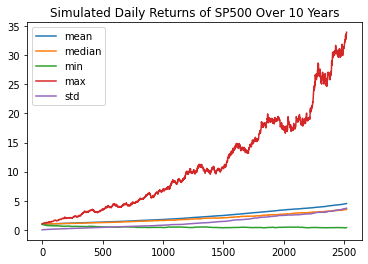

In [221]:
df_sp500_returns.plot(title="Simulated Daily Returns of SP500 Over 10 Years")

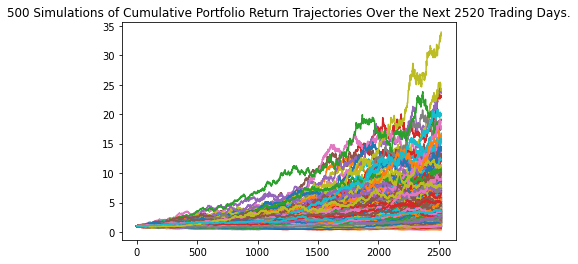

In [222]:
line_plot = MC_sp500.plot_simulation()

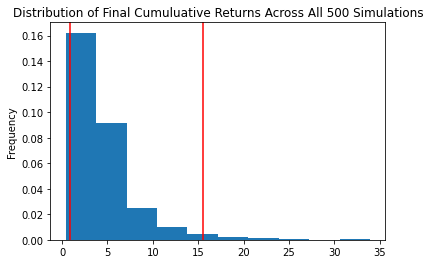

In [223]:
dist_plot = MC_sp500.plot_distribution()

In [224]:
sp500_table = MC_sp500.summarize_cumulative_return()

print(sp500_table)

count           500.000000
mean              4.522476
std               3.720048
min               0.393010
25%               2.308910
50%               3.512461
75%               5.354808
max              33.919387
95% CI Lower      0.905810
95% CI Upper     15.506287
Name: 2520, dtype: float64


In [225]:
SP500_lower = round(sp500_table[8]*10000,2)
SP500_upper = round(sp500_table[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${SP500_lower} and ${SP500_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $9058.1 and $155062.87.


<AxesSubplot:>

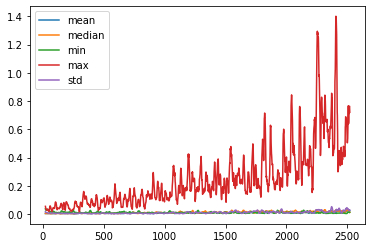

In [227]:
#Rolling Statistics ????
df_sp500_returns.rolling(window=21).std().plot()

# ESG Portfolios compared with SPY

In [228]:
# Combining ESG portfolios and SPY

combined_port = esg_closing_prices.merge(sp500_closing_prices, left_index=True, right_index=True)
combined_port

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
2017-05-04,58.0100,62.5400,106.5300,67.8000,29.8800,13.26,238.75
2017-05-05,58.0662,63.1826,107.2100,NaN,29.7400,13.42,239.72
2017-05-08,58.0694,62.7600,107.3400,68.9250,29.6000,13.28,239.67
2017-05-09,58.0800,62.5300,107.4299,67.9700,29.6200,13.26,239.46
2017-05-10,58.2400,62.6500,107.5000,67.9300,30.1000,13.24,239.85
...,...,...,...,...,...,...,...
2021-01-08,94.2000,75.7700,153.3400,80.3000,55.3800,25.97,381.24
2021-01-11,93.7300,74.8200,152.2499,79.4169,55.2001,25.47,378.74
2021-01-12,93.6500,75.1500,152.4160,79.5400,55.4300,25.03,378.81
2021-01-13,93.8300,75.0600,152.6800,79.4841,55.7180,25.10,379.76


In [229]:
combined_port.describe()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
count,930.000000,932.000000,929.000000,880.000000,928.000000,931.000000,932.000000
mean,70.553122,64.497059,119.263777,68.839216,37.703861,13.968169,288.269501
std,8.470685,4.181011,9.900015,4.646381,5.289277,2.372064,32.543004
min,55.585000,46.330000,89.440000,49.250000,28.604400,10.230000,222.510000
25%,64.670050,62.620000,113.070000,66.351000,34.012250,12.830000,265.520000
50%,68.895000,64.550000,117.950000,69.397500,36.806200,13.240000,282.765000
75%,75.235000,67.295000,123.210000,71.908175,40.602625,13.980000,306.385000
max,94.200000,75.770000,153.340000,80.300000,55.718000,26.015000,381.240000


<AxesSubplot:>

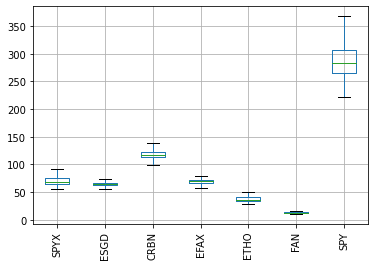

In [230]:
combined_port.boxplot(showfliers=False, rot=90)

In [231]:
#Combined Portfolio Daily Returns
combined_port_returns = (combined_port/combined_port.shift(1)) -1
combined_port_returns





,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,0.000969,0.010275,0.006383,NaN,-0.004685,0.012066,0.004063
2017-05-08,0.000055,-0.006689,0.001213,NaN,-0.004707,-0.010432,-0.000209
2017-05-09,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506,-0.000876
2017-05-10,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508,0.001629
...,...,...,...,...,...,...,...
2021-01-08,0.003836,0.008384,0.007225,0.006518,0.002678,-0.001730,0.005751
2021-01-11,-0.004989,-0.012538,-0.007109,-0.010998,-0.003248,-0.019253,-0.006558
2021-01-12,-0.000854,0.004411,0.001091,0.001550,0.004165,-0.017275,0.000185
2021-01-13,0.001922,-0.001198,0.001732,-0.000703,0.005196,0.002797,0.002508


<AxesSubplot:>

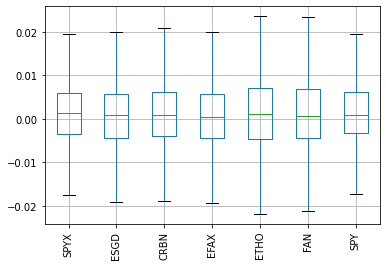

In [232]:
combined_port_returns.boxplot(showfliers=False, rot=90)

<AxesSubplot:>

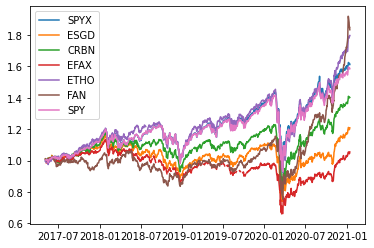

In [233]:
(combined_port_returns+1).cumprod().plot()

<AxesSubplot:>

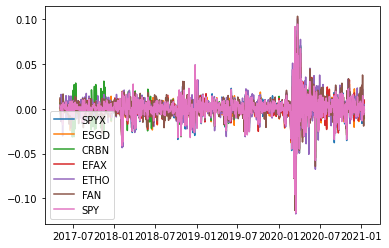

In [234]:
combined_port_returns.plot()

<AxesSubplot:>

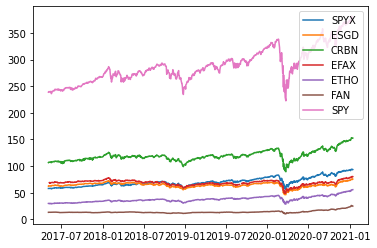

In [235]:
combined_port.plot()

In [236]:
combined_port_returns.iloc[-10:]

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
2020-12-31,0.007037,-0.008282,-0.001810,-0.007510,0.003406,-0.002995,0.005162
2021-01-04,-0.016233,0.006024,-0.004231,0.005387,-0.009612,0.026609,-0.013374
2021-01-05,0.005901,0.009254,0.009982,0.008802,0.006851,0.010242,0.006696
2021-01-06,0.005106,0.011866,0.003939,0.007840,0.021382,0.037865,0.005952
2021-01-07,0.014267,0.001333,0.012706,0.001004,0.022035,0.037281,0.014805
2021-01-08,0.003836,0.008384,0.007225,0.006518,0.002678,-0.001730,0.005751
2021-01-11,-0.004989,-0.012538,-0.007109,-0.010998,-0.003248,-0.019253,-0.006558
2021-01-12,-0.000854,0.004411,0.001091,0.001550,0.004165,-0.017275,0.000185
2021-01-13,0.001922,-0.001198,0.001732,-0.000703,0.005196,0.002797,0.002508
2021-01-14,-0.004156,0.007194,-0.001048,0.009862,-0.000144,-0.009960,-0.003450


In [237]:
combined_port_correlation = combined_port.corr()
combined_port_correlation

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,SPY
SPYX,1.000000,0.341758,0.927630,0.288417,0.990488,0.824315,0.998786
ESGD,0.341758,1.000000,0.660049,0.986701,0.376645,0.499415,0.370204
CRBN,0.927630,0.660049,1.000000,0.616706,0.934508,0.877405,0.936501
EFAX,0.288417,0.986701,0.616706,1.000000,0.317022,0.498022,0.313556
ETHO,0.990488,0.376645,0.934508,0.317022,1.000000,0.835373,0.992210
FAN,0.824315,0.499415,0.877405,0.498022,0.835373,1.000000,0.817827
SPY,0.998786,0.370204,0.936501,0.313556,0.992210,0.817827,1.000000


<AxesSubplot:>

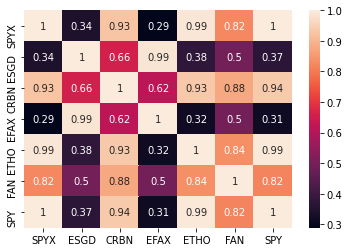

In [238]:
sb.heatmap(combined_port_correlation, annot=True)

<AxesSubplot:>

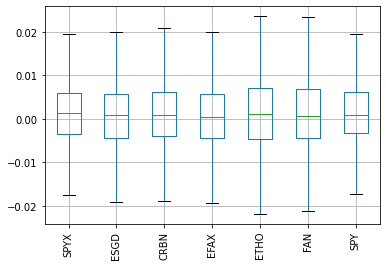

In [239]:
combined_port_returns.boxplot(showfliers=False, rot=90)

In [240]:
# Which portfolios are riskier than SP500
esg_closing_prices.std()>sp500_closing_prices['SPY'].std()

SPYX    False
ESGD    False
CRBN    False
EFAX    False
ETHO    False
FAN     False
dtype: bool